In [1]:
!pip install geocoder
!pip install tqdm
!pip install folium

In [2]:
#A biblioteca faz uma solicitação GET ao servidor, que fará o download dos conteúdos HTML da página solicitada para nós. 
import requests
from bs4 import BeautifulSoup

page = requests.get("https://weather.com/weather/tenday/l/BRXX0158:1:BR") #Natal

#Instância da classe BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

#Exibe todo o HTML da página
#NÃO RODAR POIS O HTML É MUITO GRANDE E DEMORA
#print(soup.prettify())

#Um status_code com resultado 200 significa que a página foi baixada com sucesso
page.status_code

200

In [15]:
#Encontra todas as instâncias
ten_days = soup.find_all("tr", class_="clickable")
ten_days.pop(0)
days_max = []
days_min = []
precips = []
humidity = []

for day in ten_days:
    days_max.append(int(day.find("td", class_="temp").find_all("span")[0].get_text().encode('ascii', 'ignore')))
    days_min.append(int(day.find("td", class_="temp").find_all("span")[2].get_text().encode('ascii', 'ignore')))
    precips.append(int(day.find("td", class_="precip").find_all("span")[2].get_text().encode('ascii', 'ignore')[:-1]))
    humidity.append(int(day.find("td", class_="humidity").find_all("span")[0].get_text().encode('ascii', 'ignore')[:-1]))
for i in range(14):
    print(str(((days_max[i]-32)/1.8))+"ºC " + str(((days_min[i]-32)/1.8))+"ºC "+str(precips[i])+"% "+str(humidity[i])+"%")

28.88888888888889ºC 22.22222222222222ºC 10% 74%
28.88888888888889ºC 22.77777777777778ºC 20% 75%
28.88888888888889ºC 22.77777777777778ºC 20% 74%
28.88888888888889ºC 22.77777777777778ºC 40% 74%
28.88888888888889ºC 22.22222222222222ºC 40% 74%
28.88888888888889ºC 22.77777777777778ºC 60% 77%
27.77777777777778ºC 22.77777777777778ºC 60% 79%
28.333333333333332ºC 22.22222222222222ºC 60% 80%
28.333333333333332ºC 22.22222222222222ºC 60% 76%
28.88888888888889ºC 22.77777777777778ºC 20% 74%
28.333333333333332ºC 22.77777777777778ºC 20% 75%
28.333333333333332ºC 22.77777777777778ºC 60% 76%
28.333333333333332ºC 22.22222222222222ºC 80% 76%
28.333333333333332ºC 22.77777777777778ºC 50% 76%


In [48]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import show, output_notebook
from bokeh.layouts import row, column, gridplot
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
import pandas as pd
import numpy as np

#Cada lista de itens que temos é passada como parte de um dicionário
#Cada chave do dicionário vai se tornar uma coluna no DataFrame, e cada lista se tornará os valores da coluna.


weather = pd.DataFrame({
        "max (Fahrenheit)": days_max, 
        "min (Fahrenheit)": days_min, 
        "precips": precips, 
        "humidity":humidity
    })
weather

,humidity,max (Fahrenheit),min (Fahrenheit),precips
0,74,84,72,10
1,75,84,73,20
2,74,84,73,20
3,74,84,73,40
4,74,84,72,40
5,77,84,73,60
6,79,82,73,60
7,80,83,72,60
8,76,83,72,60
9,74,84,73,20


In [49]:
weather.head()

,humidity,max (Fahrenheit),min (Fahrenheit),precips
0,74,84,72,10
1,75,84,73,20
2,74,84,73,20
3,74,84,73,40
4,74,84,72,40


In [50]:
weather.columns

Index(['humidity', 'max (Fahrenheit)', 'min (Fahrenheit)', 'precips'], dtype='object')

In [51]:
weather.shape

(14, 4)

In [52]:
#maior valor dos dias
a = 0
for i in range(14):
    if(a <= days_max[i]):
        a = days_max[i]
        
print(a)
    

84


In [53]:
#menor valor dos dias
b = 1000
for i in range(14):
    if(b > days_min[i]):
        b = days_min[i]
        
print(b)

72


In [62]:
soma = 0
for i in range(14):
    soma = soma + days_max[i]
print(soma)

1168


In [86]:
media = soma/14

print(str("A media maxima da temperatura dos dias eh: " + str(media) + "ºF "))

A media maxima da temperatura dos dias eh: 83.42857142857143ºF 


In [70]:
soma_min = 0
for i in range(14):
    soma_min = soma_min + days_min[i]
print(soma_min)

1017


In [71]:
media_min = soma_min/14

print(str("A media maxima da temperatura dos dias eh: " + str(media_min) + "ºF "))

#print((str)("A media maxima da temperatura dos dias eh: " + media + "oF"))

A media maxima da temperatura dos dias eh: 72.64285714285714ºF 


In [74]:
#média máxima e média mínima e número de dias com mais de 50% de chances de chover
media_minima = 0
media_maxima = 0
for i in range(14):
    if(precips[i] > 50):
        media_minima = days_min[i]
        media_maxima = days_max[i]
        
print(media_minima)
print(media_maxima)

72
83


In [89]:
print(str("A media da precipitacao dos dias eh: " + str(weather["precips"].mean()) + "ºF "))

A media da precipitacao dos dias eh: 42.857142857142854ºF 


In [91]:
print(str("A media da precipitacao dos dias eh: " + str(weather["humidity"].mean()) + "ºF "))

A media da precipitacao dos dias eh: 75.71428571428571ºF 


In [60]:
p2 = figure(x_axis_label = "Days maximum", y_axis_label = "Humidity")
p2.circle(days_max, humidity)
output_notebook()
show(p2)

Loading BokehJS ...

In [92]:
p3 = figure(x_axis_label = "Days minimun", y_axis_label = "Humidity")
p3.circle(days_min, humidity)
output_notebook()
show(p2)

Loading BokehJS ...

In [103]:
p4 = figure(x_axis_label = "Days minimun", y_axis_label = "Days maximun")
p4.circle(days_min, days_max)
output_notebook()
show(p2)

Loading BokehJS ...

In [105]:
p5 = figure(x_axis_label = "Humidity", y_axis_label = "Precips")
p5.circle(humidity, precips)
output_notebook()
show(p2)

Loading BokehJS ...

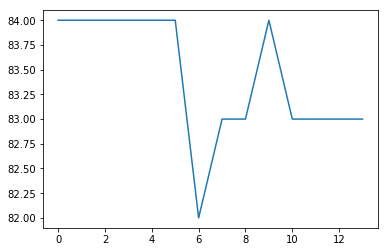

In [96]:
import matplotlib.pyplot as plt
plt.plot(days_max)
plt.show()

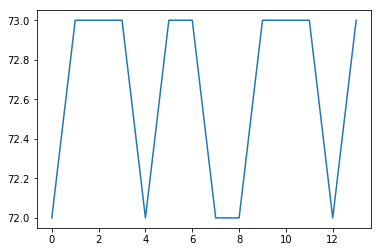

In [100]:
plt.plot(days_min)
plt.show()

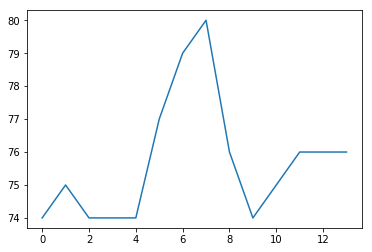

In [101]:
plt.plot(humidity)
plt.show()

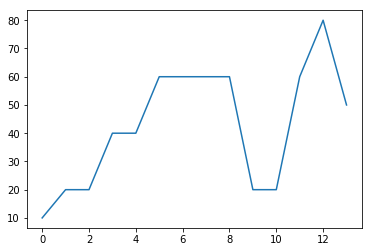

In [102]:
plt.plot(precips)
plt.show()

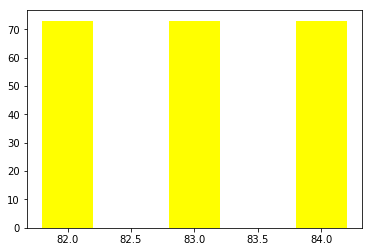

In [106]:
width_n = 0.4
bar_color = 'yellow'

plt.bar(days_max, days_min, width=width_n, color=bar_color)
plt.show()

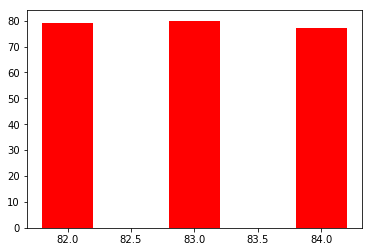

In [107]:
width_n = 0.4
bar_color = 'red'

plt.bar(days_max, humidity, width=width_n, color=bar_color)
plt.show()